# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import dataframe from Part 1

In [2]:
# Create path

path = r'/Users/dianaalatriste/Documents/Instacart'

In [3]:
# Import dataframe 

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check output by checking dataframe shape

df.shape

(32404859, 31)

In [5]:
# Check head of dataframe

df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,State,Age,number_of_children,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


# 03. Create a histogram of the “order_hour_of_day” column

### You need to provide the Instacart senior stakeholders with descriptive findings about sales

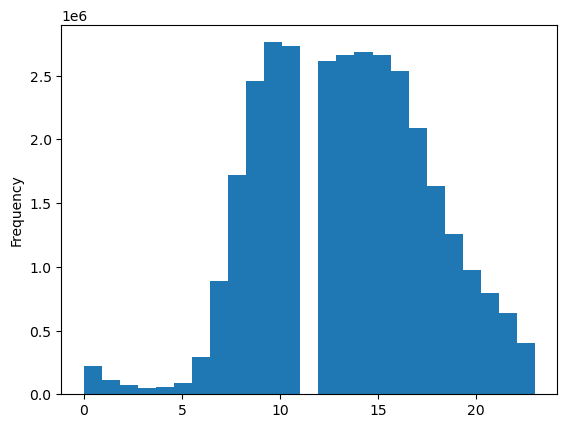

In [11]:
hist = df['order_hour_of_day'].plot.hist(bins = 25)

In [9]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_order_hour_of_day_25bin.png'))

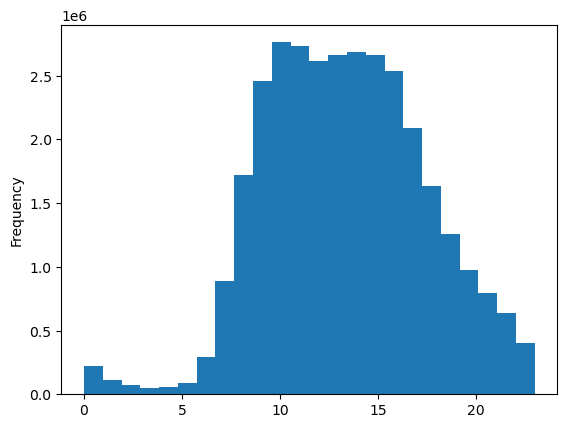

In [12]:
# Create histogram with 24 bins, like hours in a day

hist_2 = df['order_hour_of_day'].plot.hist(bins = 24)

In [13]:
# Export histogram 2

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_order_hour_of_day_24bin.png'))

#### Around 0 and 5 hours in the morning there's no much activity in terms of sales. Hour zero though has some representative values which makes me wonder: 

#### a) If sales are open throughout the 24 hrs of the day, and
#### b) If this is case, if Instacart has an option of setting a time for delivery.

# 04. Create a bar chart from the “loyalty_flag” column

### The marketing team is curious about the distribution of orders among customers in terms of loyalty

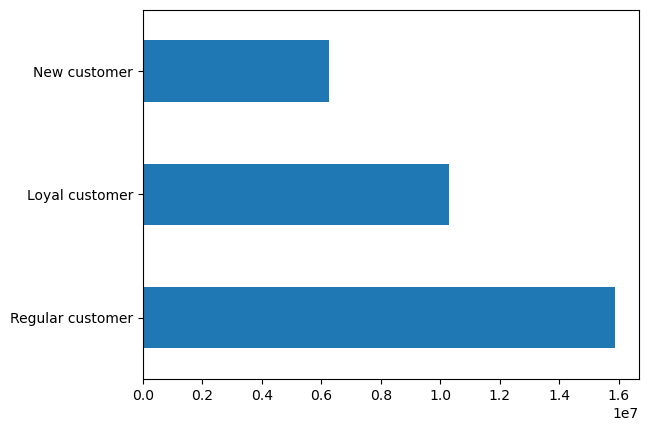

In [17]:
# Create bar chart for 'loyalty flag' column

bar = df['loyalty_flag'].value_counts().plot.barh()

In [18]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# 05. Check if there's a difference in expenditure depending on hour of the day

### To check this it is necessary to use an accurate sample for the line chart

In [19]:
# First is necessary to sample the data. Create list with True/False values 70/30 distribution

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [20]:
# Store 70% of data in dataframe 'big'

big = df[dev]

In [22]:
# Store 30% of data in dataframe 'small'

small = df[~dev]

In [23]:
# Check output by comparing number of rows together and combined

# Check number of rows in full dataframe

len(df)

32404859

In [24]:
# Check number of rows of combined dataframes

len(big) + len(small)

32404859

#### Number of rows matched! Data sampling was successful!

### Reduce sample to relevant columns for analysis

In [25]:
df_2 = small[['prices', 'order_hour_of_day']]

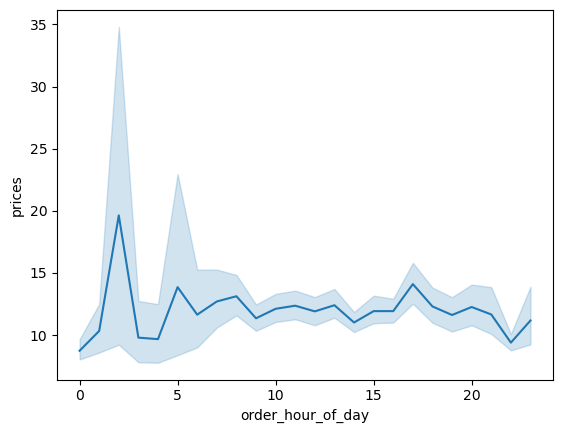

In [26]:
# Create line plot

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [27]:
# Export line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_pricesvshod.png'))

# 06. conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. Check for connection between age and family situation

### Create line chart exploring connections between age and number of dependants (aka number_of_children)

### Reduce sample to relevant columns for analysis

In [30]:
# Create subset of small with relevant columns

df_3 = small[['Age', 'number_of_children']]

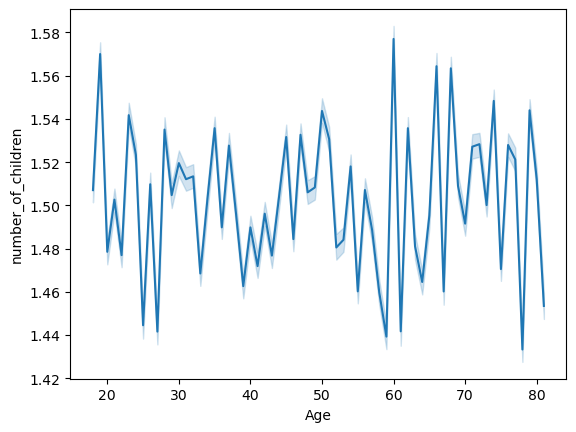

In [35]:
# Create line plot

line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_children')

In [33]:
# Check frequency of 'number of children' in small

small['number_of_children'].value_counts()

3    2440208
2    2428233
0    2427640
1    2425017
Name: number_of_children, dtype: int64

### The line chart does not provide much information to be honest. Checking the frquency of number_of_children in the 'small' dataframe , it is obvious that several customers have between 0 and 3 children. That is not visible in the line chart. 

In [36]:
# Export line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_children.png'))

# 07. Explore whether there’s a connection between age and spending power (income).

### Create a scatterplot using the sns.scatterplot() function.

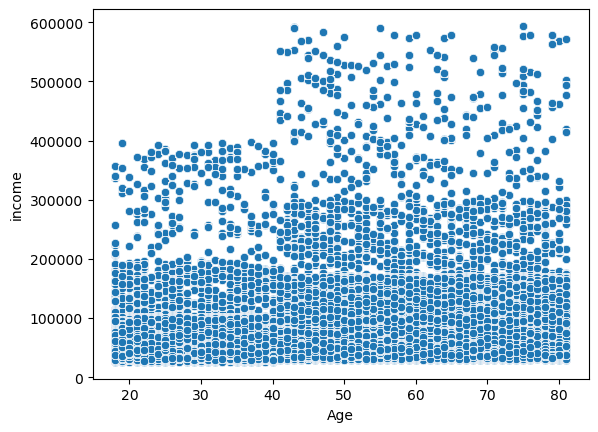

In [39]:
scatter_plot = sns.scatterplot(x = 'Age', y = 'income',data = df)

In [40]:
# Export graph

scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_plot_fulldata.png'))

In [41]:
# Create scatter plot with a subset of small

df_4 = small[['Age', 'income']]

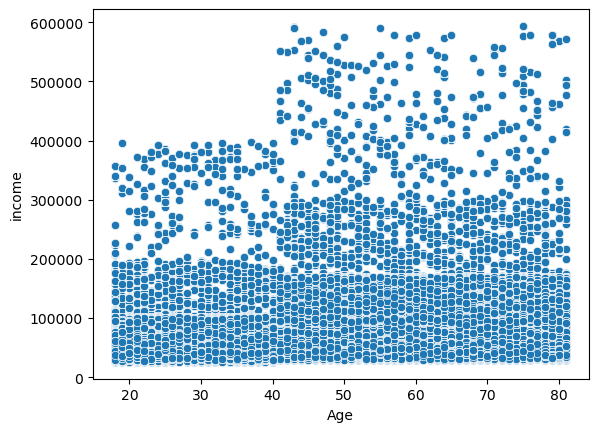

In [42]:
# Redo graph

scatter_plot2 = sns.scatterplot(x = 'Age', y = 'income',data = df_4)

In [43]:
# Export graph

scatter_plot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_plot_smalldata.png'))

#### From the two graphs, we cannot really infer any relationship between Age and spending power. 

In [44]:
print('End of part 2')

End of part 2
